<a href="https://colab.research.google.com/github/JiteshKumar9/Hate-Speech-Detection/blob/main/Hate_Speech_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing Lib
import pandas as pd
import numpy as np

In [3]:
dataset = pd.read_csv("twitter.csv")

In [4]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [5]:
dataset.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [7]:
dataset.describe()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class
count,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000,24783.000000
mean,12681.192027,3.243473,0.280515,2.413711,0.549247,1.110277
std,7299.553863,0.883060,0.631851,1.399459,1.113299,0.462089
min,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,6372.500000,3.000000,0.000000,2.000000,0.000000,1.000000
50%,12703.000000,3.000000,0.000000,3.000000,0.000000,1.000000
75%,18995.500000,3.000000,0.000000,3.000000,0.000000,1.000000
max,25296.000000,9.000000,7.000000,9.000000,9.000000,2.000000


In [8]:
dataset["labels"] = dataset["class"].map({0: "hate speech",
                                          1:"offensive language",
                                          2:"no hate or offensive language"})

In [9]:
dataset

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,labels
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive language
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an...",no hate or offensive language
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies,offensive language


In [11]:

data = dataset[["tweet", "labels"]]
data


,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",no hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [12]:
data

,tweet,labels
0,!!! RT @mayasolovely: As a woman you shouldn't...,no hate or offensive language
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,offensive language
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,offensive language
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,offensive language
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,offensive language
...,...,...
24778,you's a muthaf***in lie &#8220;@LifeAsKing: @2...,offensive language
24779,"you've gone and broke the wrong heart baby, an...",no hate or offensive language
24780,young buck wanna eat!!.. dat nigguh like I ain...,offensive language
24781,youu got wild bitches tellin you lies,offensive language


In [16]:
import re
import nltk
import string
from nltk.corpus import stopwords

In [19]:
import nltk
from nltk.corpus import stopwords

# Download the stopwords data
nltk.download('stopwords')

# Create a set of English stopwords
stop_words = set(stopwords.words("english"))

# Output a few stopwords as an example
print("Some stopwords:", list(stop_words)[:10])

Some stopwords: ['under', 'how', 'each', 'between', 'its', 'through', 'why', 'just', 'did', "it's"]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
# Import stemming
stemmer= nltk.SnowballStemmer("english")

In [23]:
# Data cleaning
def clean_data(text):
    # Convert text to lowercase
    text = str(text).lower()

    # Remove URLs
    text = re.sub(r"https?://\S+|www\.\S+", '', text)

    # Remove text inside square brackets
    text = re.sub(r'\[.*?\]', '', text)

    # Remove HTML tags
    text = re.sub(r'<.*?>+', '', text)

    # Remove punctuation
    text = re.sub(r'[%s]' % re.escape(string.punctuation), '', text)

    # Remove newlines
    text = re.sub(r'\n', '', text)

    # Remove words containing numbers
    text = re.sub(r'\w*\d\w*', '', text)

    # Remove stopwords
    text = [word for word in text.split() if word not in stop_words]
    text = " ".join(text)

    # Apply stemming
    text = [stemmer.stem(word) for word in text.split()]
    text = " ".join(text)

    return text


In [25]:

data["tweet"] = data["tweet"].apply(clean_data)

<ipython-input-25-8c64c83ec45b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean_data)


In [26]:
data

,tweet,labels
0,rt mayasolov woman shouldnt complain clean hou...,no hate or offensive language
1,rt boy dat coldtyga dwn bad cuffin dat hoe place,offensive language
2,rt urkindofbrand dawg rt ever fuck bitch start...,offensive language
3,rt cganderson vivabas look like tranni,offensive language
4,rt shenikarobert shit hear might true might fa...,offensive language
...,...,...
24778,yous muthafin lie coreyemanuel right tl trash ...,offensive language
24779,youv gone broke wrong heart babi drove redneck...,no hate or offensive language
24780,young buck wanna eat dat nigguh like aint fuck...,offensive language
24781,youu got wild bitch tellin lie,offensive language


In [27]:
X= np.array(data["tweet"])
Y= np.array(data["labels"])

In [28]:
X

array(['rt mayasolov woman shouldnt complain clean hous amp man alway take trash',
       'rt boy dat coldtyga dwn bad cuffin dat hoe place',
       'rt urkindofbrand dawg rt ever fuck bitch start cri confus shit',
       ..., 'young buck wanna eat dat nigguh like aint fuckin dis',
       'youu got wild bitch tellin lie',
       'ruffl ntac eileen dahlia beauti color combin pink orang yellow amp white coll'],
      dtype=object)

In [30]:

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [31]:
cv= CountVectorizer()
X= cv.fit_transform(X)

In [32]:
X

<24783x25693 sparse matrix of type '<class 'numpy.int64'>'
	with 197862 stored elements in Compressed Sparse Row format>

In [34]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [35]:
x_train

<16604x25693 sparse matrix of type '<class 'numpy.int64'>'
	with 132620 stored elements in Compressed Sparse Row format>

In [50]:

from sklearn.tree import DecisionTreeClassifier

In [37]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [38]:
y_pred=dt.predict(x_test)

In [39]:
# Confusion Matrix and accuracy
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 148,   37,  280],
       [  30, 1149,  200],
       [ 238,  240, 5857]])

In [40]:
import seaborn as sns
import matplotlib.pyplot as ply
%matplotlib inline

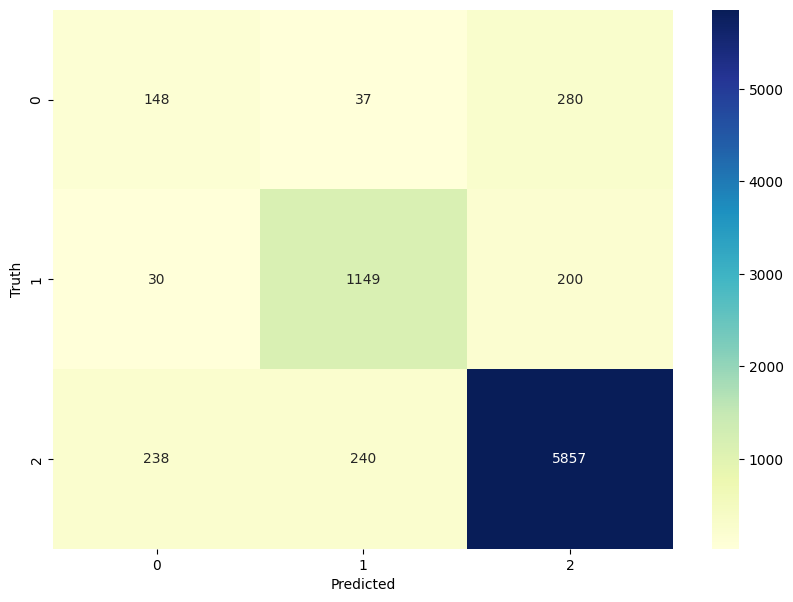

In [42]:

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [43]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.87467905611933

In [45]:

sample = "let's unite and kill all the people who are protesting against the government"
cleaned_sample = clean_data(sample)
cleaned_sample

'let unit kill peopl protest govern'

In [46]:
sample

"let's unite and kill all the people who are protesting against the government"

In [47]:
data1= cv.transform([sample]).toarray()

In [48]:
data1

array([[0, 0, 0, ..., 0, 0, 0]])

In [49]:
dt.predict(data1)

array(['hate speech'], dtype=object)